In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [19]:
results = pd.read_csv('C:/Users/BRUCE NYASH 31/Desktop/F1 data/F1/results/results.csv')
races = pd.read_csv('C:/Users/BRUCE NYASH 31/Desktop/F1 data/F1/races.csv')
constructors=  pd.read_csv('C:/Users/BRUCE NYASH 31/Desktop/F1 data/F1/constructors.csv')


In [33]:
drivers = pd.read_csv('C:/Users/BRUCE NYASH 31/Desktop/F1 data/F1/drivers.csv', encoding= "ISO-8859-1")

In [61]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [36]:
df=pd.merge(results,races[['raceId','year','name','round']],on='raceId',how = 'left')
df=pd.merge(df, drivers[['driverId','driverRef','nationality']],on = 'driverId',how='left')
df=pd.merge(df, constructors[['constructorId','name','nationality']],on = 'constructorId',how='left')


In [40]:
df.drop(['number','position','positionText','fastestLap','statusId','resultId','raceId','constructorId'],axis=1,inplace=True)

In [50]:
df.head()

,driverId,grid,positionOrder,points,laps,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driverNationality,cunstructorName,constructorNationality
0,1,1,1,10.0,58,34:50.6,5690616.0,2.0,01:27.5,218.3,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,5,2,8.0,58,5.478,5696094.0,3.0,01:27.7,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,7,3,6.0,58,8.163,5698779.0,5.0,01:28.1,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,11,4,5.0,58,17.181,5707797.0,7.0,01:28.6,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,3,5,4.0,58,18.014,5708630.0,1.0,01:27.4,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [72]:
df.rename(columns={'rank':'fastest_lap_rank','name_x':'gpName','nationality_x':'driverNationality','name_y':'cunstructorName','nationality_y':'constructorNationality','driverRef':'driver'},inplace=True)


In [74]:
df.rename(columns={'fastest_lap_rank':'fastestLapRank','gp_name':'gpName','cunstructorName':'constructorName',},inplace=True)
df.head()

,driverId,grid,positionOrder,points,laps,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gpName,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,1,10.0,58,34:50.6,5690616.0,2.0,01:27.5,218.3,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,5,2,8.0,58,5.478,5696094.0,3.0,01:27.7,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,7,3,6.0,58,8.163,5698779.0,5.0,01:28.1,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,11,4,5.0,58,17.181,5707797.0,7.0,01:28.6,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,3,5,4.0,58,18.014,5708630.0,1.0,01:27.4,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [75]:
df=df[['year','gpName','round','driver','constructorName','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driverNationality','constructorNationality']]

In [76]:
df=df[df['year']!=2019]

In [78]:
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [86]:
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastestLapRank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [87]:
df.reset_index(drop=True,inplace=True)

In [89]:
print(df.shape)

(23777, 15)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    23777 non-null  int64  
 1   gpName                  23777 non-null  object 
 2   round                   23777 non-null  int64  
 3   driver                  23777 non-null  object 
 4   constructorName         23777 non-null  object 
 5   grid                    23777 non-null  int64  
 6   positionOrder           23777 non-null  int64  
 7   points                  23777 non-null  float64
 8   time                    6004 non-null   object 
 9   milliseconds            6003 non-null   float64
 10  fastestLapRank          5531 non-null   float64
 11  fastestLapTime          5383 non-null   object 
 12  fastestLapSpeed         5383 non-null   object 
 13  driverNationality       23777 non-null  object 
 14  constructorNationality  23777 non-null

In [91]:
df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2017,Australian Grand Prix,1,vettel,Ferrari,2,1,25.0,24:11.7,5051672.0,3.0,01:26.6,220.351,German,Italian
1,2017,Australian Grand Prix,1,hamilton,Mercedes,1,2,18.0,9.975,5061647.0,6.0,01:27.0,219.351,British,German
2,2017,Australian Grand Prix,1,bottas,Mercedes,3,3,15.0,11.25,5062922.0,2.0,01:26.6,220.465,Finnish,German
3,2017,Australian Grand Prix,1,raikkonen,Ferrari,4,4,12.0,22.393,5074065.0,1.0,01:26.5,220.605,Finnish,Italian
4,2017,Australian Grand Prix,1,max_verstappen,Red Bull,5,5,10.0,28.827,5080499.0,5.0,01:27.0,219.525,Dutch,Austrian
5,2017,Australian Grand Prix,1,massa,Williams,7,6,8.0,+1:23.386,5135058.0,9.0,01:28.0,216.83,Brazilian,British
6,2017,Australian Grand Prix,1,perez,Force India,10,7,6.0,NaN,NaN,10.0,01:28.3,216.115,Mexican,Indian
7,2017,Australian Grand Prix,1,sainz,Toro Rosso,8,8,4.0,NaN,NaN,8.0,01:27.7,217.74,Spanish,Italian
8,2017,Australian Grand Prix,1,kvyat,Toro Rosso,9,9,2.0,NaN,NaN,4.0,01:26.7,220.165,Russian,Italian
9,2017,Australian Grand Prix,1,ocon,Force India,13,10,1.0,NaN,NaN,11.0,01:28.5,215.776,French,Indian


In [99]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

In [103]:
driverWinner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

([], [])

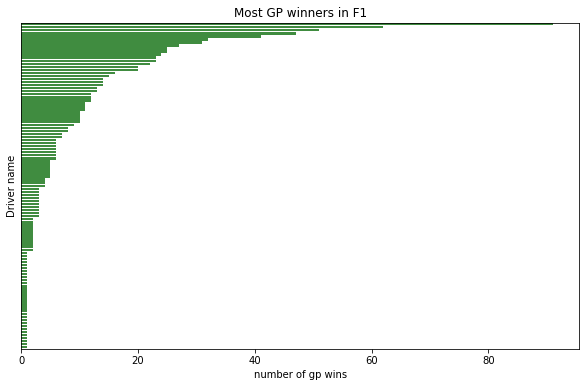

In [105]:
sb.barplot(data=driverWinner, y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title('Most GP winners in F1')
plt.ylabel('Driver name')
plt.xlabel('number of gp wins')
plt.yticks([])



In [107]:
top10Drivers=driverWinner.head(10)
print(top10Drivers)

               driver  positionOrder
0  michael_schumacher             91
1            hamilton             62
2               prost             51
3              vettel             47
4               senna             41
5              alonso             32
6             mansell             31
7             stewart             27
8               lauda             25
9               clark             25


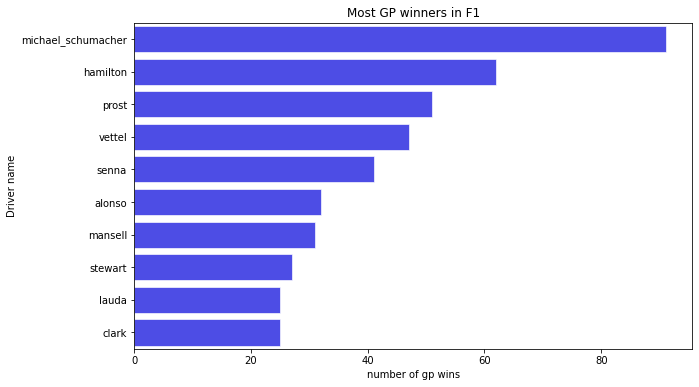

In [109]:
sb.barplot(data=top10Drivers, y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=0.8,edgecolor='white')
plt.title('Most GP winners in F1')
plt.ylabel('Driver name')
plt.xlabel('number of gp wins');

([], [])

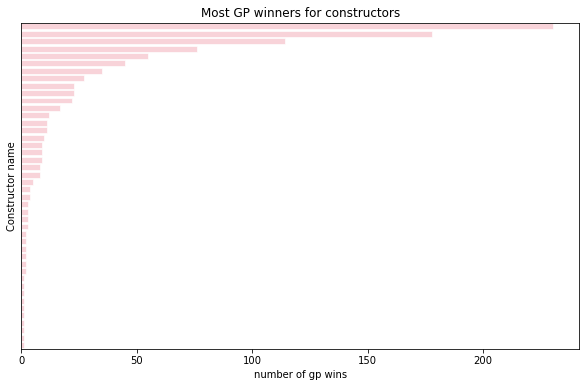

In [112]:
constructorWinner=df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=constructorWinner, y='constructorName',x='positionOrder',color='pink',alpha=0.8,linewidth=0.8,edgecolor='white')

plt.title('Most GP winners for constructors')
plt.ylabel('Constructor name')
plt.xlabel('number of gp wins')
plt.yticks([])


In [114]:
top10Constructors=constructorWinner.head(10)
print(top10Constructors)

  constructorName  positionOrder
0         Ferrari            230
1         McLaren            178
2        Williams            114
3        Mercedes             76
4        Red Bull             55
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


Text(0.5, 0, 'number of gp wins')

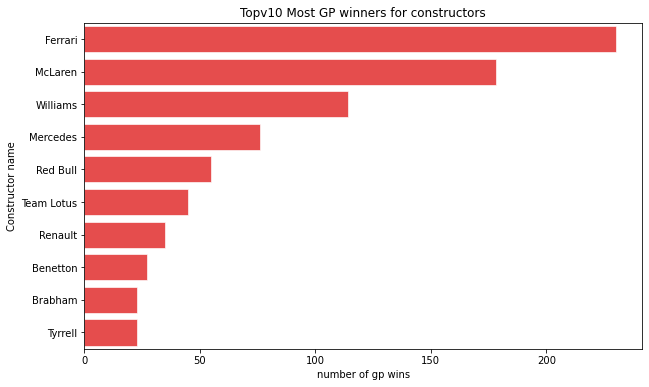

In [115]:
sb.barplot(data=top10Constructors, y='constructorName',x='positionOrder',color='red',alpha=0.8,linewidth=0.8,edgecolor='white')

plt.title('Topv10 Most GP winners for constructors')
plt.ylabel('Constructor name')
plt.xlabel('number of gp wins')

Text(0.5, 0, 'starting position')

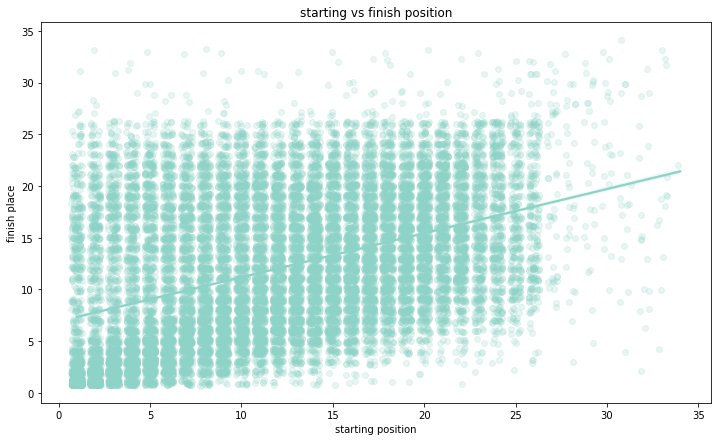

In [117]:
df_no_zero=df[df['grid']!=0]
plt.figure(figsize=[12,7])
sb.regplot(data=df_no_zero,x='grid',y='positionOrder',x_jitter=0.3,y_jitter=0.3,scatter_kws={'alpha':1/5});
plt.title('starting vs finish position')
plt.ylabel('finish place')
plt.xlabel('starting position')

In [119]:
dfSpeed=df[df['year']>=2004]
dfGroupSpeed=dfSpeed.groupby(['gpName','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

g=sb.FacetGrid(data=dfGroupSpeed,col='gpName', col_wrap=5)
g.map(plt.scatter,'year','fastestLapSpeed',alpha=0.8, linewidth=0.8,edgecolor='black',s=100)
g.set_titles('(col_name)')
g.set_xlabels('year')
g.set_ylabel('average fastest speed')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('average speed among all teams during the fastest lap at individual GPs')

TypeError: Could not convert 199.387198.808198.668199.05198.609198.398198.508199.294197.97198.113197.346198.272198.447198.441197.422197.705198.152195.498199.212193.522 to numeric